In [51]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# List of possible questions that the dataset can explain

0. Why did UN generate this dataset
1. How many variables are the dataset
2. How many instances
3. What are the datatypes of the variables
4. Do they have missing values
6. What the average of all the numerical values
7. When was this dataset generated
8. Why did they make it public
9. What insight could this data provide
10. How are variables correlated between each other


In [52]:
co2_data = pd.read_csv('SYB66_310_202310_Carbon Dioxide Emission Estimates.csv', encoding='latin-1', skiprows=1)

In [53]:
co2_data.head(10)

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980",NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975",NaN,"International Energy Agency, IEA World Energy ..."
5,8,Albania,2018,Emissions (thousand metric tons of carbon diox...,"4,525",NaN,"International Energy Agency, IEA World Energy ..."
6,8,Albania,2019,Emissions (thousand metric tons of carbon diox...,"4,200",NaN,"International Energy Agency, IEA World Energy ..."
7,8,Albania,2020,Emissions (thousand metric tons of carbon diox...,"3,512",NaN,"International Energy Agency, IEA World Energy ..."
8,8,Albania,1975,Emissions per capita (metric tons of carbon di...,1.8,NaN,"International Energy Agency, IEA World Energy ..."
9,8,Albania,1985,Emissions per capita (metric tons of carbon di...,2.3,NaN,"International Energy Agency, IEA World Energy ..."


In [54]:
co2_data.tail(10)

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
2254,716,Zimbabwe,2019,Emissions (thousand metric tons of carbon diox...,"12,525",NaN,"International Energy Agency, IEA World Energy ..."
2255,716,Zimbabwe,2020,Emissions (thousand metric tons of carbon diox...,"10,647",NaN,"International Energy Agency, IEA World Energy ..."
2256,716,Zimbabwe,1975,Emissions per capita (metric tons of carbon di...,1.1,NaN,"International Energy Agency, IEA World Energy ..."
2257,716,Zimbabwe,1985,Emissions per capita (metric tons of carbon di...,1.1,NaN,"International Energy Agency, IEA World Energy ..."
2258,716,Zimbabwe,2005,Emissions per capita (metric tons of carbon di...,0.9,NaN,"International Energy Agency, IEA World Energy ..."
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2263,716,Zimbabwe,2020,Emissions per capita (metric tons of carbon di...,0.5,NaN,"International Energy Agency, IEA World Energy ..."


What is are the  types of data found in the dataset? 
1. The dataset contains 3  numerical columns which are the  Region/Country/Area , Year and Values 
2. The dataset contains 3 other non numerical columns which are Unnamed: 1 , Series and Source 

#Talk about the naming of the Unnamed  1 and why the decision of calling it country 

In [55]:
#renaming the Unnamed: 1 to Country 
co2_data.rename(columns= {"Unnamed: 1":"Country"},inplace=True)

In [56]:
#dropping Foot notes columns 

co2_data.drop(columns="Footnotes", inplace=True)


#Why did you drop the foot cotes columns 
The Footnotes  column can be dropped since it contains only Nan values thus it is irrelevant.  

Question 01  : What is the number of columns and rows that are present in the dataset ? 

In [57]:
#shape of the dataset 
co2_data.shape

(2264, 6)

Question 02  :  The name of columns which are present in the dataset. 

In [58]:
co2_data.columns.unique()

Index(['Region/Country/Area', 'Country', 'Year', 'Series', 'Value', 'Source'], dtype='object')

Question 03: What are the datatypes of the dataset and are there missing values 

In [59]:
#checking the data types and Missing values of the dataset
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  2264 non-null   int64 
 1   Country              2264 non-null   object
 2   Year                 2264 non-null   int64 
 3   Series               2264 non-null   object
 4   Value                2264 non-null   object
 5   Source               2264 non-null   object
dtypes: int64(2), object(4)
memory usage: 106.2+ KB


## Insights 

1. The dataset seems not to have any missing values. 
2. The datatype for the column Value is object but it should be changed to Float 64 for easy computation. 

In [60]:
#create separate datasets or columns for   thousand metric tons  emission 
k_co2 = co2_data[co2_data['Value'].str.contains(',')]

In [61]:
#renamong the value columns 
k_co2.rename(columns= {"Value":"CO2/kt"},inplace=True)

In [62]:
#changing the datatype of Value column to float 
k_co2['CO2/kt'] = k_co2['CO2/kt'].str.replace(',','').astype(float)

In [63]:
#observing the dataset 
k_co2.head(10)

,Region/Country/Area,Country,Year,Series,CO2/kt,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,"International Energy Agency, IEA World Energy ..."
5,8,Albania,2018,Emissions (thousand metric tons of carbon diox...,4525.0,"International Energy Agency, IEA World Energy ..."
6,8,Albania,2019,Emissions (thousand metric tons of carbon diox...,4200.0,"International Energy Agency, IEA World Energy ..."
7,8,Albania,2020,Emissions (thousand metric tons of carbon diox...,3512.0,"International Energy Agency, IEA World Energy ..."
16,12,Algeria,1975,Emissions (thousand metric tons of carbon diox...,13691.0,"International Energy Agency, IEA World Energy ..."
17,12,Algeria,1985,Emissions (thousand metric tons of carbon diox...,42446.0,"International Energy Agency, IEA World Energy ..."


In [64]:
#create a separate dataset for  metric tons per capita
p_co2 = co2_data[~co2_data['Value'].str.contains(',')]

In [65]:
p_co2.rename(columns= {"Value":"CO2/t_per_capita"},inplace=True)

In [82]:
#changing the datatype of Value column to float 
p_co2['CO2/t_per_capita'] = p_co2['CO2/t_per_capita'].astype(float)

In [83]:
#observing the dataset 
p_co2.head(10)

,Region/Country/Area,Country,Year,Series,CO2/t_per_capita,Source
8,8,Albania,1975,Emissions per capita (metric tons of carbon di...,1.8,"International Energy Agency, IEA World Energy ..."
9,8,Albania,1985,Emissions per capita (metric tons of carbon di...,2.3,"International Energy Agency, IEA World Energy ..."
10,8,Albania,2005,Emissions per capita (metric tons of carbon di...,1.3,"International Energy Agency, IEA World Energy ..."
11,8,Albania,2010,Emissions per capita (metric tons of carbon di...,1.4,"International Energy Agency, IEA World Energy ..."
12,8,Albania,2015,Emissions per capita (metric tons of carbon di...,1.3,"International Energy Agency, IEA World Energy ..."
13,8,Albania,2018,Emissions per capita (metric tons of carbon di...,1.5,"International Energy Agency, IEA World Energy ..."
14,8,Albania,2019,Emissions per capita (metric tons of carbon di...,1.4,"International Energy Agency, IEA World Energy ..."
15,8,Albania,2020,Emissions per capita (metric tons of carbon di...,1.2,"International Energy Agency, IEA World Energy ..."
24,12,Algeria,1975,Emissions per capita (metric tons of carbon di...,0.8,"International Energy Agency, IEA World Energy ..."
25,12,Algeria,1985,Emissions per capita (metric tons of carbon di...,1.9,"International Energy Agency, IEA World Energy ..."


In [84]:
#merge the two datasets  using country columns 
merged_data = pd.merge(p_co2,k_co2 ,on="Country")

In [85]:
#dropping the other dataset corresponding values 
merged_data = merged_data.drop(['Region/Country/Area_y','Year_y','Series_y','Source_y'],axis = 1)

In [87]:
#statistical description of the dataset
merged_data.describe()

,Region/Country/Area_x,Year_x,CO2/t_per_capita,CO2/kt
count,8566.000000,8566.000000,8566.000000,8.566000e+03
mean,436.441980,2006.511908,14.598097,1.937559e+05
std,250.551883,15.504417,85.139450,8.155823e+05
min,8.000000,1975.000000,0.000000,1.001000e+03
25%,218.000000,2005.000000,0.900000,6.885000e+03
50%,414.000000,2015.000000,3.200000,2.398700e+04
75%,646.000000,2019.000000,6.900000,9.009000e+04
max,894.000000,2020.000000,998.000000,1.019064e+07


### Insights from the Statistical description 

Question 04: Is there any trend in the co2 emmission ? 

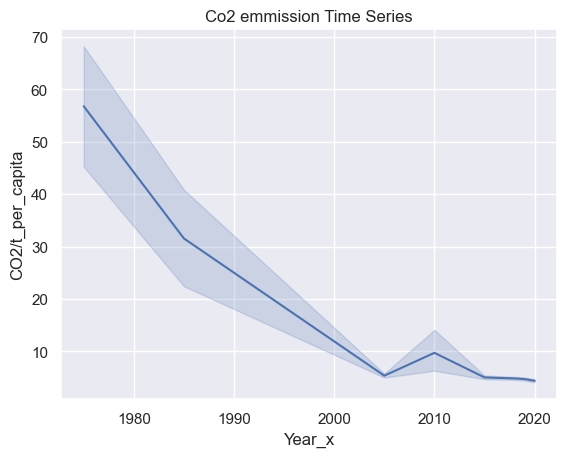

In [88]:
#Checking for the trend  of co2 emission per capita in the data 
sns.lineplot(data=merged_data, y='CO2/t_per_capita',x='Year_x')
plt.title("Co2 emmission per capita Time Series")
plt.show()

### Observations from the c02 trend line 
1. The amount of co2   emission  per capita is dicreasing  

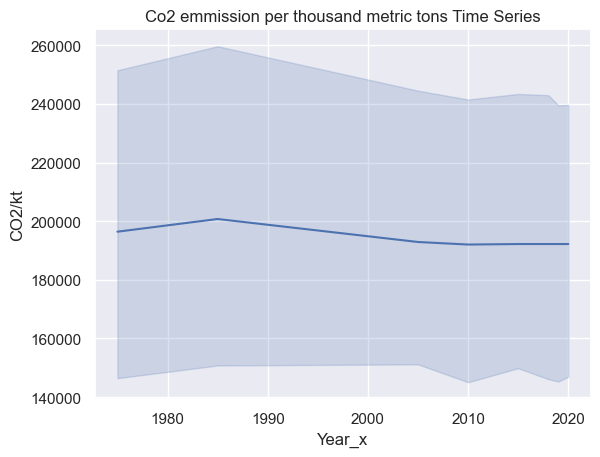

In [89]:
#Checking for the trend  of co2 emission per thousand metric tons  in the data 
sns.lineplot(data=merged_data, y='CO2/kt',x='Year_x')
plt.title("Co2 emmission per thousand metric tons Time Series")
plt.show()

Question 05: what is the distribution of the data ? 

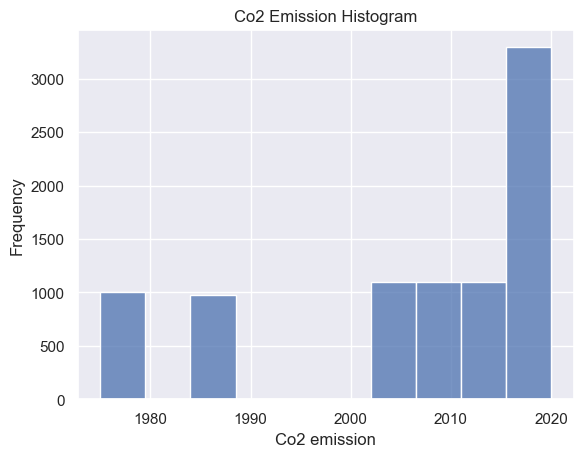

In [90]:
sns.histplot(x= merged_data['Year_x'],bins=10)
plt.xlabel('Co2 emission')
plt.ylabel('Frequency')
plt.title('Co2 Emission Histogram')
plt.show()

Question 06: Are there nan/Missing  values or Outliers  in the data ? 

In [ ]:
#checking for nan values in the data 
co2_data.isna().sum()